# **TP4** : Velocity Verlet algorithm - Molecular Dymanics Laboratory


The velocity Verlet algorithm is a numerical integration method commonly used in molecular dynamics simulations. It provides an efficient and accurate way to update the positions and velocities of particles under the influence of forces derived from potential energy. The algorithm ensures good energy conservation over time. Here a 1D velcoty Verlet algorithm is implemented, giving us the following equations:

## Formulas

1. **Position update**:  
   Position is updated using the previous position , velocity , and acceleration:  
   $$
   \mathbf{x}(t + \Delta t) = \mathbf{x}(t) + \mathbf{v}(t) \Delta t + \frac{1}{2} \mathbf{a}(t) \Delta t^2
   $$

2. **Velocity update**:  
   Velocity is updated using the previous, velocity , acceleration , and current acceleration:  
   $$
   \mathbf{v}\left(t + {\Delta t}\right) = \mathbf{v}(t) + \frac{1}{2} (\mathbf{a}(t) + \mathbf{a}(t + \Delta t) \Delta t
   $$

3. **Intial and updated acceleration**:  
   Evaluation of acceleration with mass and energy gradient from the SBH model of the previous lab (TP3):  
   $$
   \mathbf{a} = \frac{-1}{\mathbf{M}} \frac{\mathbf{d}\mathbf{E}(\mathbf{x}(t))}{\mathbf{dx}}
   $$
   Where the updated acceleration is the following:
   $$
   \mathbf{a}(t + \Delta t) = \frac{-1}{\mathbf{M}} \frac{\mathbf{d}\mathbf{E}(\mathbf{x}(t + \Delta t))}{\mathbf{dx}}
   $$
   
   where $ \mathbf{E} $ is the energy derived from the SBH energy 

5. **Total Energy**:  
   The total energy at time $ t $: $$ \mathbf{E}_t(t) = \mathbf{E}_k(t) + \mathbf{E}(t)  $$  
   Where the kinetic energy is the following:
   $$
   \mathbf{E}_k(t) = \frac{1}{2} \mathbf{M} \mathbf{v}(t)^2 
   $$

## Tasks
4. Implement the above 1D velocity verlet algorithm for a single co-ordinate with any external forces, where the total energy is conversed if it follows this condition: 
$$
\left| E_T(t) - E_T(t - \Delta t) \right| \leq \delta \varepsilon
$$
Where $ \delta \varepsilon = 0.04 $

5. Run a 1-Picosecond simulation based on the parameters given in Table 1 (TP3), starting with $ R_1 $. If the system is at a minimum and starting with a total energy of 0.1 Hartree, the initial velocity becomes the following:
$$ \mathbf{E}_t(t) = \mathbf{E}_k(t) + 0  $$
$$ \mathbf{E}_t(t) = \frac{1}{2} \mathbf{M} \mathbf{v0}(t)^2   $$
$$
\mathbf{v_0} = \sqrt{\frac{2 \mathbf{E}_T(t)}{M}}
$$

6. Run the simulation with different total energy values where $ \mathbf{E}_t(t) = \mathbf{E}_k(t) + 0  $ in the $ R_2 $ starting position, the minimum energy is calculated from the plot of $ R_1 $ vs _time_


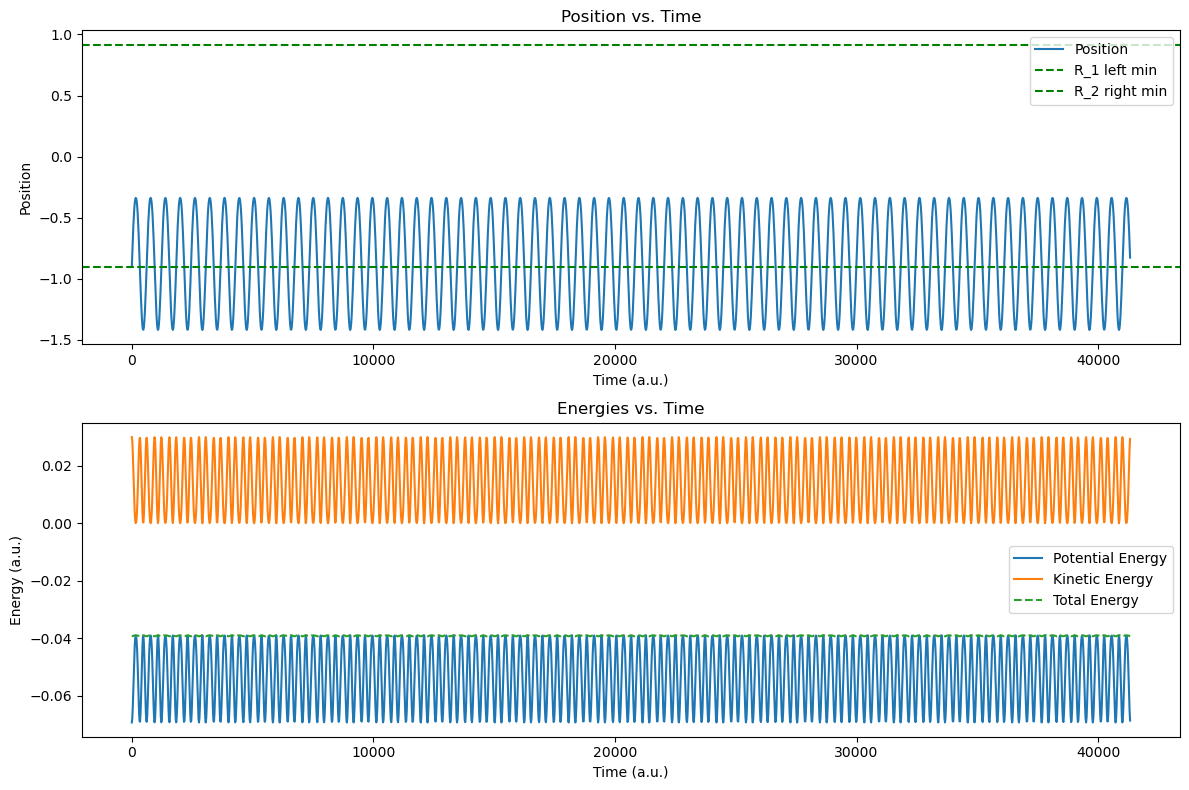

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def verlet_vel(x, v, dt, n, eth):
    # Initialize arrays
    xs, vs, ac, t, ks, ets, us = (np.zeros(n) for _ in range(7))

    # Set initial conditions
    xs[0], vs[0], t[0] = x, v, 0
    ac[0] = accel_func(xs[0])
    ks[0] = 0.5 * m * vs[0]**2
    us[0] = pot_func(xs[0])
    ets[0] = ks[0] + us[0]

    for i in range(1, n):
        # Update position, acceleration, and velocity
        xs[i] = xs[i-1] + vs[i-1] * dt + 0.5 * ac[i-1] * dt**2
        a_new = accel_func(xs[i])
        vs[i] = vs[i-1] + 0.5 * (ac[i-1] + a_new) * dt
        ac[i] = a_new

        # Update time and energies
        t[i] = t[i-1] + dt
        ks[i] = 0.5 * m * vs[i]**2
        us[i] = pot_func(xs[i])
        ets[i] = ks[i] + us[i]

        # Check energy threshold
        if abs(ets[i] - ets[-1]) <= eth:
            break

    return xs, vs, t, ets, ks, ac, us

  
def pot_func(x):
    #sbh_energy from TP3
    energy_term_1 = 0.5 * (m * omega_1**2 * x**2)
    eta = g_1 * x + e_0
    energy_term_2 = (-1)**1 * np.sqrt(eta**2 + v_0**2)
    E_i = energy_term_1 + energy_term_2
    return E_i

def accel_func(x):
    #sbh_gradient_energy from TP3
    energy_term_1 = (m * omega_1**2 * x)
    eta = g_1 * x + e_0
    energy_term_2 = ((-1)**1) * (g_1 * (eta)/(np.sqrt(eta**2 + v_0**2)))
    dE_i = energy_term_1 + energy_term_2
    return -dE_i * (1/m)

 
# Varaibles from Table 1 - TP3
m = 1836
omega_1 = 0.01136364  
g_1 = 0.22      
e_0 = 0.03674933          
v_0 = 0.03674933

# Initial conditions
R_1 = -0.905
R_2 = 0.917
#x0 = 0.917 #R_2
x0 = -0.905 #R_1
Etot = 0.03 #0.1, 0.15, 0.05, 0.06 used
v0 = (2*(Etot)/m)**0.5 # As all kinetic energy equals E_total at R_1
dt = 20
n = int(41341.374575751/dt) #steps for one picosecond in a.u.
eth = 0.004  # Energy threshold

# Running simulation
xs, vs, t, ets, ks, ac, us = verlet_vel(x0, v0, dt, n, eth)



# Plotting results
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t, xs, label="Position")
plt.axhline(y=R_1, color="g", linestyle="--", label="R_1 left min")
plt.axhline(y=R_2, color="g", linestyle="--", label="R_2 right min")
plt.legend()
plt.xlabel("Time (a.u.)")
plt.ylabel("Position")
plt.title("Position vs. Time")


plt.subplot(2, 1, 2)
plt.plot(t, us, label="Potential Energy")
plt.plot(t, ks, label="Kinetic Energy")
plt.plot(t, ets, label="Total Energy", linestyle="--")
plt.legend()
plt.xlabel("Time (a.u.)")
plt.ylabel("Energy (a.u.)")
plt.title("Energies vs. Time")

plt.tight_layout()
plt.show()

## Results
4. The code seems to work fine, however it will only work for very small values of $ \delta \varepsilon $, meaning that the total energy is not conserved.

5. The simulation was run with a total energy of _0.1_ at the $ R_1 $ starting position, for one picosecond (41341.374575751 a.u.). The total energy seems to increase slow over each time step, meaning it is close to conservation however it still does not follow the threshold of $ \delta \varepsilon = 0.004 a.u. $. For small values of $ \delta \varepsilon $ we can see the trajectory behaving as expected.

6. The position vs time can be shown above which determines how much energy is required to jump from the left to the right well, as shown the total energy converges to a value of $  ~ 0.06 $$a.u. $
